<center><img src="data/itesm.png"/></center>
<h1 style='text-align: center;'><b>Maestría en Inteligencia Artificial Aplicada</b></h1>

<h2 style='text-align: center;'><b>Curso: Estrategia de implementación de servicios tecnológicos</b></h2>
<h2 style='text-align: center;'><b>Tecnológico de Monterrey</b></h2>
<h2 style='text-align: center;'><b>Prof Titular: Luis Eduardo Falcón Morales</b></h2>
<h2 style='text-align: center;'><b>Prof Tutor: Carlos Villaseñor</b></h2>

<h3 style='text-align: center;'><b>ALUMNO: </b>Cecilia Acevedo Rodríguez</h3>
<h3 style='text-align: center;'><b>MATRICULA: </b>A01793953</h3>
<h3 style='text-align: center;'><b>ALUMNO: </b>Johan Andrés Castro Gomez</h3>
<h3 style='text-align: center;'><b>MATRICULA: </b>A01793556</h3>
<h3 style='text-align: center;'><b>ALUMNO: </b> Guillermo Alfonso Muñiz Hermosillo</h3>
<h3 style='text-align: center;'><b>MATRICULA: </b>A01793101</h3>
<h3 style='text-align: center;'><b>ALUMNO: </b>Ricardo Morales Bustillos</h3>
<h3 style='text-align: center;'><b>MATRICULA: </b>A01740032</h3>
<h3 style='text-align: center;'><b>ALUMNO: </b>Fredy Reyes Sánchez</h3>
<h3 style='text-align: center;'><b>MATRICULA: </b>A01687370</h3>



<h2 style='text-align: center;'><b>Actividad de la Semana 05</b></h2>
<h2 style='text-align: center;'><b>5.2 Actividad: Continuando con caso de estudio: Amazon-Yelp-Imdb</b></h1>
<h4 style='text-align: right;'>Mayo 2023</h4>

## **Ejercicio - 1:**

Descarga los 3 archivos de Canvas. En particular, el archivo de datos de IMDb ya no requiere
transformarse para obtener sus 1000 registros. Al cargar los datos de los tres archivos deberás
tener un DataFrame de Pandas de 3000 registros, con sus etiquetas. Los archivos los encuentras en
Canvas y se llaman: amazon5.txt, imdb5.txt, yelp5.txt. 


In [1]:
import pandas as pd  
import numpy as np

df = pd.concat([pd.read_csv('data/amazon5.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8'), 
                pd.read_csv('data/imdb5.txt', sep='   ', names=['review','label'], header=None, encoding='utf-8'), 
                pd.read_csv('data/yelp5.txt', sep='\t', names=['review','label'], header=None, encoding='utf-8')], 
               ignore_index=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


C:\Users\gmuni\AppData\Local\Temp\ipykernel_25132\717470586.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  pd.read_csv('data/imdb5.txt', sep='   ', names=['review','label'], header=None, encoding='utf-8'),


In [2]:
df.isnull().sum()

review    0
label     0
dtype: int64

## **Ejercicio - 2:**

Realiza de nuevo un proceso de limpieza. Aplica el preprocesamiento que consideres adecuado, sin
embargo, deberás aplicar necesariamente alguna de las técnicas de lematización. Como aplicaremos
modelos embebidos pre-entrenados, queremos palabras lo más cercanas a las existentes en un
idioma, inglés en este caso. Aplica y justifica cualquier otro proceso de limpieza que consideres
adecuado. Recuerda que en esta actividad se usarán vectores embebidos para un problema de
clasificación, por lo que deberás tomar de acuerdo a este contexto. Justifica todas las
transformaciones que se apliquen. 


In [3]:
# Importamos las librerias necesarias.
import re
import nltk
# Importamos la libreria de lemanizacion de nltk para aplicarla a nuestro documento.
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('omw-1.4')

# Necesitamos crear un conjunto de stopwords. Usamos el conjunto predefinido en la practica anterior de la libreria nltk
from nltk.corpus import stopwords
nltk.download('stopwords')    # para tener acceso a "stopwords" en varios idiomas.

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gmuni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gmuni\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\gmuni\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gmuni\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gmuni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
wnl = WordNetLemmatizer()

# Asi mismo usaremos el conjunto de las palabras negativas usadas en la practica anterior.
negwords = [ 'no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Definimos nuestro conjunto de stopwords customizado, 
# quitando las palabras negativas del conjunto de nltk para considerarlas al momento de realizar nuestro analisis de sentimiento.
mystopwords = [w for w in stopwords.words('english') if w not in negwords ]


def tag_word(tag):
    if tag == 'VERB':
        return 'v'
    if tag == 'ADV':
        return 'r'
    if tag == 'ADJ':
        return 'a'
    else:
        return 'n'


# Antes de comenzar separamos nuestros documentos y nuestras labels en 2 conjuntos de datos denominados X y Y
X = df.review     # Serie de strings
Y = df.label      # Serie de enteros 0s y 1s

# Una vez separados comenzamos el procesamiento de nuestras strings.  
# Creamos una funcion para llevar a cabo este proceso paso por paso.
def clean_doc(doc):
    #Remplazamos todos los caracteres que no sean alfabéticos por espacio
    newDoc = re.sub(r'[^A-Za-z\s]',' ', doc) 
    # Convertir a minusculas nuestro documento. Ya que facilita el analisis de cada documento y las transformaciones a realizar.
    newDoc = doc.lower()
     # Eliminar toda la puntuacion (excepto salto de lineas y puntos ya que son tratados en el siguiente paso) ya que no son relevantes para nuestro analisis.\n",
    newDoc = re.sub(r'[^a-z|^\\n|^ |^\\.]+', ' ', newDoc)
    # Eliminar puntos finales, seguidos y suspensivos.
    newDoc = re.sub(r'(\\.+)', ' ', newDoc)
    # Eliminar espacios multiples.
    newDoc = re.sub(r'\s+', ' ',newDoc).strip() #Quitamos todos los espacios adicionales
    tokens = word_tokenize(newDoc)
    # Lemmatization
    word_type = pos_tag(tokens, tagset='universal')
    tokens = [wnl.lemmatize(x[0],pos = tag_word(x[1]))for x in word_type]
    # Eliminar stopwords, Eliminamos tambien palabras de longitud 1
    tokens = [word for word in tokens if (word not in mystopwords) & (len(word)>=2)]

    return tokens

In [5]:
# Procesamos cada doc en el corpus
Xclean = [clean_doc(x) for x in X]  
print(f"Tamaño final del conjunto de datos: {len(Xclean)}")
Xclean[0:5] 

Tamaño final del conjunto de datos: 3000


[['no', 'way', 'plug', 'unless', 'go', 'converter'],
 ['good', 'case', 'excellent', 'value'],
 ['great', 'jawbone'],
 ['tie', 'charger', 'conversation', 'last', 'minutes.major', 'problem'],
 ['mic', 'great']]

# Ejercicio 3. 
Llamar Xclean a los comentarios procesados y Y a las etiquetas. Realicemos una partición aleatoria
con los mismos porcentajes de la práctica pasada para poder comparar dichos resultados con los de
esta actividad, a saber, 70%, 15% y 15%, para entrenamiento, validación y prueba,
respectivamente. Verifica que obtienes 2100 registros de entrenamiento y 450 para cada uno de
validación y prueba. 


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_val_test, y_train, y_val_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=1) 
x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=.50, shuffle=True, random_state=17)

print('X,y Train:', len(x_train), len(y_train))
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


# Ejercicio 4. 
Usando el conjunto de entrenamiento genera un vocabulario que no sea mayor a 1500 palabras, ni
menor a 1000. 


In [7]:
from collections import Counter

midiccionario = Counter()    

for k in range(len(x_train)):
  midiccionario.update(x_train[k])
print('Tamaño del diccionario antes de la limpieza: ', len(midiccionario))

min_freq = 2

midiccionario = Counter((({tk: count for tk,count in midiccionario.items() if count >= min_freq})))

print('Tamaño del vocabulario Filtrado:', len(midiccionario))  
print('Palabras mas frecuentes:\n(palabra,frecuencia):') 
print(midiccionario.most_common(10))

Tamaño del diccionario antes de la limpieza:  3398
Tamaño del vocabulario Filtrado: 1451
Palabras mas frecuentes:
(palabra,frecuencia):
[('not', 225), ('good', 192), ('great', 141), ('movie', 140), ('phone', 132), ('film', 130), ('work', 113), ('bad', 106), ('time', 101), ('like', 100)]


- ¿Por qué es importante acotar un vocabulario inferior y superiormente? 

R: Es importante para reducir la complejidad de nuestro corpus, ayudando a simplificar el procesamiento y hacerlo mas eficiente y reduciendo el uso de recursos computacionales. Tambien nos puede ayudar en la comprension del contexto de los documentos que estemos procesando ya que el modelo puede aprender con mayor precision las asociaciones y relaciones que pueden existir entre ellas. Asi mismo mejora el rendimiento y velocidad de respuesta de los modelos, haciendolo especialmente importante para aplicaciones donde es necesario procesar el texto rapidamente.

- ¿Por qué debe usarse solamente el conjunto de entrenamiento para generar el diccionario? 

R: El conjunto de entrenamiento es comunmente el conjunto mas representativo de nuestro corpus linguistico. Al utilizar este conjunto se asegura el uso de las palabras mas relevantes y frecuentes reflejando mejor el lenguaje y el domininion del problema. Se evita la filtracion de datos y se le da mas coherencia a la representacion del texto ya que se puede mapear correctamente el diccionario a nuestro corpus. 

Con este vocabulario que obtienes, filtra los conjuntos de entrenamiento, validación y prueba, de esta
manera todos los comentarios usarán solamente palabras válidas de acuerdo a este vocabulario.
Indica el tamaño del vocabulario obtenido. 

In [8]:
def get_filtered_data(x_data):
    filtered_data = []
    for doc in x_data:
        filtered_data.append([w for w in doc if w in midiccionario])
    return filtered_data 

In [9]:
filtered_train_x = get_filtered_data(x_train)
print('Longitud del conjunto de entrenamiento Filtrado:', len(filtered_train_x))  


filter_val_x = get_filtered_data(x_val)
print('Longitud del conjunto de validacion Filtrado:', len(filter_val_x))  

filtered_test_x = get_filtered_data(x_test)
print('Longitud del conjunto de Pureba Filtrado:', len(filtered_test_x))  



Longitud del conjunto de entrenamiento Filtrado: 2100
Longitud del conjunto de validacion Filtrado: 450
Longitud del conjunto de Pureba Filtrado: 450


# Ejercicio 5

Utilizarás los vectores embebidos FastText preentrenados por Facebook.
* a. Incluye una tabla comparativa de pros y contras entre los modelos FastText, word2vec de
Google y Glove de Stanford. Puedes consultar sus páginas correspondientes:

    - https://fasttext.cc/
    - https://code.google.com/archive/p/word2vec/
    - https://nlp.stanford.edu/projects/glove/ 


In [10]:
import fasttext
import fasttext.util

# fasttext.util.download_model('en', if_exists='ignore')  # English
ft = fasttext.load_model('data/cc.en.300.bin')

|  |    FastText    | word2vec de Google  |   GloVe de Stanford    |
| --- | --- | --- | --- |
| Pros  |   Considera la estructura de subpalabras, lo que permite capturar la información de las palabras compuestas y las relaciones morfológicas más finas.  |    Proporciona un rendimiento y calidad de vectores que son adecuados para tareas de procesamiento del lenguaje natural. |    Considera la coocurrencia global de palabras en un corpus, lo que ayuda a capturar relaciones semánticas más amplias |
|   |   Buen rendimiento en tareas de análisis de sentimientos  |    Conserva relaciones semánticas y sintácticas |    Extensamente pre-entrenado en una amplia variedad de corpus, lo que le brinda una base sólida para diferentes tareas de NLP. |
|   |   Manejo de palabras fuera del vocabulario, lo que permite generar vectores para palabras raras o poco frecuentes.  |    Modelos pre-entrenados en múltiples idiomas,  lo que facilita su aplicación en diferentes entornos lingüísticos. |    Mantiene relaciones semánticas lineales, lo que permite operaciones de analogía como "rey - hombre + mujer = reina". |
|   |   Adecuado para lenguajes con palabras compuestas o morfología compleja  |    Capacidad para manejar grandes volúmenes de texto |    Capacidad para generar vectores de palabras extrañas |
|   |   |    Modelos pre-entrenados disponibles en diversos tamaños |  |
| Contras  |   Mayor complejidad computacional, especialmente durante el entrenamiento debido a la consideración de subpalabras.  |    Requiere grandes conjuntos de datos para entrenamiento para obtener vectores de alta calidad y generalizables. |    Requiere grandes conjuntos de datos para entrenamiento |
|   |   Tiempo de entrenamiento más largo en comparación con otros modelos, debido a la complejidad computacional y la consideración de subpalabras.  |    Dependencia de la disponibilidad de datos de Google ya que depende de la recopilacion de datos de Google |    Los vectores pueden ser sensibles al ruido del corpus |
|   |   Requiere un mayor almacenamiento de datos ya que la consideración de subpalabras aumenta  | |  |

# Ejercicio 6

Utiliza el modelo FastText de vectores embebidos pre-entrenados de dimensión 300 para generar
un nuevo diccionario clave-valor, donde la “clave” será cada token o palabra de tu vocabulario y el
“valor” será su vector embebido de dimensión 300. Este diccionario deberá ser del mismo tamaño
que el vocabulario previo que hayas construido previamente.

- https://fasttext.cc/docs/en/crawl-vectors.html

NOTA: Debido a la cantidad de recursos computacionales que demanda cargar los vectores
FastText (son 2 millones de vectores), es recomendable que una vez que generes el nuevo
vocabulario de vectores embebidos, guardes dicho diccionario en un archivo (pickle, npz o el que
consideres más adecuado). Una vez realizado lo anterior, puedes borrar la variable de FastText
para liberar memoria RAM. De esta manera, ya tienes tu vocabulario de vectores embebidos de
acuerdo a los tokens que consideras más adecuados para tu problema y puedes usarlo rápidamente
cuando lo necesites. En dado caso apóyense entre los miembros del equipo de tener dificultades
para generar el vocabulario y por mientras puedes usar el archivo del vocabulario que alguno haya
generado


In [11]:

import pickle

with open('data/vect_Vocabulario.pkl', 'wb') as file:
    pickle.dump(dict(zip(midiccionario.keys(), np.array([ft.get_word_vector(word) for word in midiccionario]))), file)

del ft


In [12]:
with open('data/vect_Vocabulario.pkl', 'rb') as file:
    vect_vocabulario = pickle.load(file)
print(f"Tamaño de vocabulario: {len(midiccionario)}")
print(f"Tamaño de vocabulario de vectores: {len(vect_vocabulario.keys())}")

Tamaño de vocabulario: 1451
Tamaño de vocabulario de vectores: 1451


# Ejercicio 7

Una manera de utilizar los vectores embebidos con modelos de aprendizaje automático en
documentos de texto, es asignar a cada comentario filtrado el vector embebido de dimensión 300
que resulta de promediar todos sus tokens. Así, en este ejercicio deberás generar los arreglos
correspondientes para los conjuntos de entrenamiento, validación y prueba. Los llamaremos
trainEmb, valEmb y testEmb, respectivamente.

In [13]:
def get_promedioFromDoc(doc):
    if len(doc) > 0:
        promedio = np.mean([vect_vocabulario[word] for word in doc if word in vect_vocabulario], axis=0).reshape(-1,1)
    else:
        promedio = np.random.uniform(-1,1,(300,1)).astype(np.float32)
    return promedio

def get_emb(x_data):
    cbb = np.array(get_promedioFromDoc(x_data[0]))
    for doc in x_data[1:]:
        cbb = np.append(cbb, get_promedioFromDoc(doc), axis=1)

    cbb = cbb.T
    return cbb
    

In [14]:
trainEmb = get_emb(filtered_train_x)

valEmb = get_emb(filter_val_x)

testEmb = get_emb(filtered_test_x)

print('Forma del vector embebido de entrenamiento :', trainEmb.shape)  
print('Forma del vector embebido de validacion :', valEmb.shape)  
print('Forma del vector embebido de pruebas :', testEmb.shape) 

Forma del vector embebido de entrenamiento : (2100, 300)
Forma del vector embebido de validacion : (450, 300)
Forma del vector embebido de pruebas : (450, 300)


- ¿Cuáles son sus dimensiones? 

R: Las dimension de los vectoreas es de la misma longitud que nuestros conjuntos, para entrenammiento (2100), para validación (450) y para pruebas (450), cada uno contará con 300 valores que corresponden al promedio de los valores de sus vectores embebidos por cada token en ellos.

- ¿Se podrían usar para su representación matrices dispersas (sparse matrices) como en el caso de la matriz Tf-idf?

R: Las matrices dispersas son matrices que contienen principalmente valores 0 y se utilizan para almacenar datos escasos o con alta dimensionalidad, en el caso de estas matrices generadas la mayorita cuenta con valores no ceros. Es decir que hablariamos de matrices densas con las cuales tambien podemos generar matrices tf-idf solo que estas tienen un mayor costo en memoria y procesamiento que una matriz dispersa.


# Ejercicio 8

Utiliza los modelos de regresión lineal y bosque aleatorio (random forest) y encuentra sus
desempeños (accuracy). Compara los resultados con los de la semana anterior. 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

modeloLRcount = LogisticRegression(max_iter=1000, solver="sag", random_state=42)
modeloLRcount.fit(trainEmb, y_train)

modeloRFcount = RandomForestClassifier(ccp_alpha=0.001, n_estimators=3, max_features= 'sqrt', max_depth= 4, min_samples_leaf= 5,random_state=42, class_weight="balanced")

modeloRFcount.fit(trainEmb, y_train)

print('LR: Train-accuracy: %.2f%%' % (100*modeloLRcount.score(trainEmb, y_train)))
print('LR: Val-accuracy: %2.f%%' % (100*modeloLRcount.score(valEmb, y_val)))

print('\nRF: Train-accuracy: %.2f%%' % (100*modeloRFcount.score(trainEmb, y_train)))
print('RF: Val-accuracy: %.2f%%' % (100*modeloRFcount.score(valEmb, y_val)))

LR: Train-accuracy: 84.67%
LR: Val-accuracy: 83%

RF: Train-accuracy: 76.76%
RF: Val-accuracy: 73.33%


En comparacion a la tarea anterior, el modelo de regresion logistica notamos un mejor rendimiento no asi el Random Forest que se mantuvo similar a los valores anteriores. Creemos que esto podria deberse la limpieza o lemmatizacion de los datos. Quiza seria necesario refinar un poco estos si queremos que random fores nos brinde un mejor modelo.

# Ejercicio 9

Obtener la matriz de confusión e interpretar sus valores. 




In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Regresion Logistica

<AxesSubplot:>

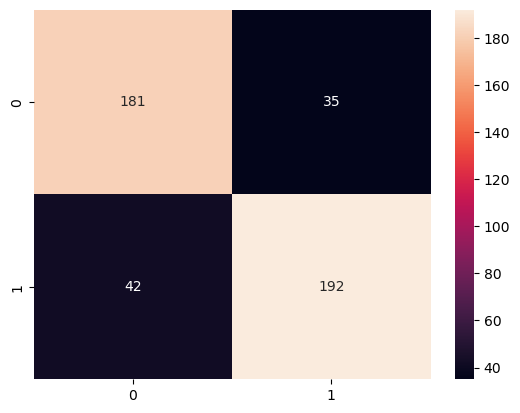

In [17]:
# Una vez entrenado el modelo, podemos predecir los resultados en nuestro conjuntos de pruebas mediante el metodo predict de nuestro modelo.
y_predict = modeloLRcount.predict(testEmb)


# Obtenidas las predicciones, es necesario crear nuestra matriz de confusion
# con el objetivo de medir el comportamiento de nuestro modelo.
# Utilizando el metodo correspondiente, nuestro conjunto de prueba y las predicciones realizadas
# Obtenemos nuestra matriz. La cual podemos mostrar con un heatmap de la libreria seaborn.

cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt = "d")



### Random Forest

<AxesSubplot:>

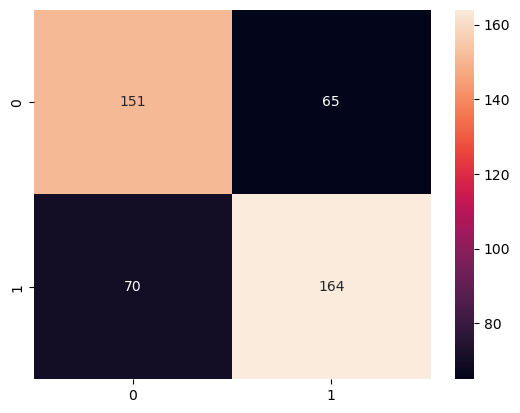

In [18]:
y_predict = modeloRFcount.predict(testEmb)
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, fmt = "d")

Podemos observar como nuestro modelo de regresion logistca superó al modelo de bosque aleatorio en términos de precisión. El modelo de regresión logística alcanzó un accuracy del 83%, generando valores mas altos en la matriz de confusion para los verdaderos negativos(181/151) y los verdaderos positivos (192/164). Esto sugiere que el enfoque de regresión logística fue más efectivo para este conjunto de datos y resalta la importancia de considerar diferentes algoritmos y técnicas para obtener los mejores resultados en un problema de clasificación. 

Sin embargo, creemos que es necesario profundizar en el análisis, la limpieza y evaluaciones de datos para determinarlas fortalezas y debilidades de cada modelo y con ello garantizar que los resultados puedan extrapolarse a otros conjuntos de datos y escenarios. Notamos que los los valores de los falsos positivos y negativos notamos que son altos por lo que también representan una área de oportunidad. 

<h2 style='text-align: center;'>CONCLUSIONES FINALES</h2>

Al comparar el uso de vectores embebidos y matrices TF-IDF pudimos identificar algunas ventajas y desventajas, así mismo notamos un impacto significativo en las métricas de evaluación del modelo.

Consideramos que una de las ventajas de utilizar vectores embebidos radica en su capacidad para capturar relaciones semánticas y significados contextuales en los datos. Al utilizar técnicas como la fasttext y modelado de lenguaje basado en transformers, los vectores embebidos pueden capturar información rica y compleja sobre las palabras y su contexto en un texto. Esto puede ser especialmente beneficioso en tareas de procesamiento de lenguaje natural, donde el significado y la representación de las palabras son cruciales.

Por otro lado, las matrices TF-IDF tienen la ventaja de ser más simples y rápidas de calcular. La matriz TF-IDF se basa en la frecuencia de términos y su importancia relativa en un conjunto de documentos. Esto puede ser útil en casos donde el enfoque principal es la frecuencia y relevancia de las palabras en un texto, como en la clasificación de documentos o en tareas de filtrado de información.

Sin embargo, el uso de vectores embebidos puede tener un impacto positivo en las métricas de evaluación del modelo en comparación con las matrices TF-IDF. Los vectores embebidos, al capturar el significado y las relaciones contextuales, pueden proporcionar una representación más rica y sofisticada de los datos. Esto puede resultar en una mejor capacidad de generalización y en un rendimiento superior en métricas de evaluación como precisión, recall y F1-score.

Por otro lado, una desventaja de los vectores embebidos es su mayor complejidad computacional y la necesidad de contar con grandes cantidades de datos para entrenar modelos de lenguaje. Además, los vectores embebidos pueden estar sujetos a sesgos inherentes en los datos de entrenamiento, lo que puede afectar la capacidad del modelo para generalizar a casos nuevos y diversos.

En resumen, los vectores embebidos ofrecen una representación más rica y contextual de los datos, lo que puede llevar a un mejor rendimiento en las métricas de evaluación del modelo en comparación con las matrices TF-IDF. Sin embargo, también es importante considerar la complejidad computacional y las posibles limitaciones y sesgos asociados con los vectores embebidos al seleccionar la mejor técnica para un problema específico.